## Enunciado
La prueba consiste en completar el código marcado con **#FIXME** para obtener automáticamente el resumen de un texto.

La decripción general de las reglas/algoritmo:

- Identificar las frecuencias de las palabras en el texto.
- Obtener las oraciones/párrafos en el texto.
- Obtener un score para cada oración/párrafo que indique su importancia en el texto, tendrán mayor score aquellas oraciones que incluyan las palabras con mayor frecuencia.
- Seleccionar las 3 oraciones con el score más alto para construir el resumen.

In [1]:
import urllib3
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from collections import defaultdict
from heapq import nlargest
import unicodedata

http = urllib3.PoolManager()

In [10]:
articleURL = "https://www.muyinteresante.es/naturaleza/video/objetivo-2030-proteger-el-30-de-la-tierra-751579255112"

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="es" xmlns:fb="http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 7]> <html class="no-js lt-ie9 lt-ie8" lang="es" xmlns:fb="http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 8]> <html class="no-js lt-ie9" lang="es" xmlns:fb="http://ogp.me/ns/fb#"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="es" xmlns:fb="http://ogp.me/ns/fb#">
<!--<![endif]-->
<head>
<script async="true" type="text/javascript">
    var elem = document.createElement('script');
    elem.src = "https://quantcast.mgr.consensu.org/v27/cmp.js";
    elem.async = true;
    elem.type = "text/javascript";
    var scpt = document.getElementsByTagName('script')[0];
    var loadingTaboola = false;
    var TaboolaInterval = null;
    scpt.parentNode.insertBefore(elem, scpt);
    (function() {
        var gdprAppliesGlobally = true;
        function addFrame() {
            if (!window.frames['__cmpLocator']) {
                if (document.bod
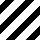
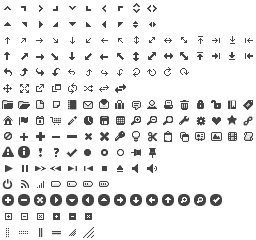
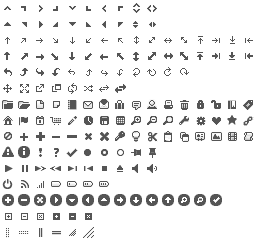
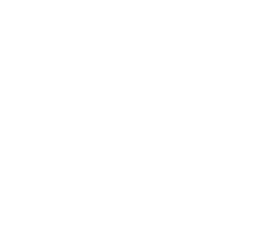
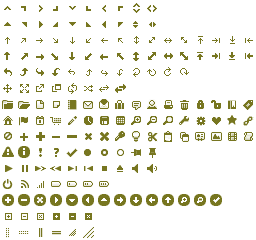
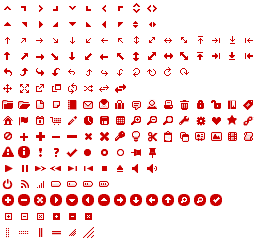
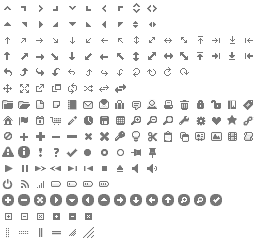

In [11]:
import requests
respuesta = requests.get(articleURL) 
soup = BeautifulSoup(respuesta.text,"html.parser")
soup

In [4]:
p_containers = soup.body.find_all(name="div", attrs={"class":"paragraph--text"})

In [12]:
p_containers[0].find_all("p")[1]

<p>El Convenio de la Organización de las Naciones Unidas (ONU) sobre Diversidad Biológica acaba de presentar el primer borrador de lo que será su hoja de ruta para los próximos diez años. El objetivo es tan ambicioso como necesario: <strong>proteger cerca de un tercio de la superficie total del planeta, incluyendo ecosistemas tanto terrestres como <a class="textlink" href="/naturaleza/articulo/actualidad-el-agua-de-los-oceanos-bate-un-nuevo-record-de-temperatura-en-2019-211579092580" title="El agua de los océanos bate un nuevo récord de temperatura en 2019">acuáticos</a>.</strong></p>

In [15]:
#El valor de la variable text debe ser una cadena con los párrafos separados por '\n'
text = '';
for p_container in p_containers:
    text = text + '\n'.join(map(lambda p: p.text, p_container.find_all("p"))) #function

In [16]:
text = unicodedata.normalize("NFKD",text) #replace \xa0 with regular space
text

'Producción: Ramiro Angulo\nEl Convenio de la Organización de las Naciones Unidas (ONU) sobre Diversidad Biológica acaba de presentar el primer borrador de lo que será su hoja de ruta para los próximos diez años. El objetivo es tan ambicioso como necesario: proteger cerca de un tercio de la superficie total del planeta, incluyendo ecosistemas tanto terrestres como acuáticos.\nEn 2019, la Plataforma Intergubernamental sobre la Biodiversidad y los Servicios Ecosistémicos (IPBES) presentaba un demoledor informe sobre el estado de la biodiversidad a nivel mundial que indicaba que en el mundo hay en torno a un millón de especies en peligro, y que las tasas de extinción se están acelerando a un ritmo sin precedentes como consecuencia de las actividades humanas. Algunos expertos ya consideran, de hecho, de que estamos viviendo la sexta extinción masiva.\nEsta enorme pérdida de biodiversidad tiene consecuencias graves para los ecosistemas, pero también para el bienestar humano. P

In [17]:
def summarize(text, n):
    sentences = sent_tokenize(text)
    
    assert n <= len(sentences)
    words = word_tokenize(text.lower())
    our_stopwords = set(stopwords.words('spanish') + list(punctuation) + ['“', '”'])
    
    words_without_stops=[word for word in words if word not in our_stopwords]
    
    #obtener un diccionario con la frecuencia de las palabras en words_without_stops
    word_frequencies = FreqDist(words_without_stops)  # collections.Counter
       
    #Obtener los scores para cada oración de acuerdo a la reglas anteriormente descritas
    #sentence_scores es un diccionario con la posición/indice de cada párrafo y su score
    sentence_scores = defaultdict(int) 
    for i,sentence in enumerate(sentences):
        for word in word_tokenize(sentence.lower()):
            #sentence_scores[i] += word_frequencies.get(word,0)
            if word in word_frequencies:
                sentence_scores[i] += word_frequencies[word]
             
        
    indexes_with_high_score =  nlargest(n, sentence_scores, key=sentence_scores.get) #function
    summary_sentences =[sentences[j] for j in sorted(indexes_with_high_score)] #function
    return summary_sentences

In [18]:
summarize(text,3)

['El denominado “borrador preliminar del marco mundial de la diversidad biológica posterior a 2020” que acaba de ser presentado por la ONU incluye veinte metas orientadas a la acción para 2030 orientadas a objetivos como reducir las amenazas a la biodiversidad y satisfacer las necesidades de las personas a través de la utilización sostenible y la participación en los beneficios.',
 'En octubre de 2020 tendrá lugar en Kunming (China) la COP15 del Convenio de las Naciones Unidas sobre Diversidad Biológica, en la que se revisará el resultado de las acciones encaminadas a cumplir los objetivos para el decenio 2010-2020 y se adoptarán decisiones en función de las recomendaciones del borrador marco, que se irá actualizando a lo largo de este año en sucesivas reuniones del grupo de trabajo.',
 '“Se da el hecho que en los procesos de toma de decisiones a menudo los representantes de los Estados son personas de perfil político con un conocimiento técnico escaso de la situación de